In [1]:
import numpy as np
import pandas as pd

In [2]:
file_path = r"C:\Users\domin\Downloads\ride-2.csv"
data = pd.read_csv(file_path, usecols=['track_seg_point_id','time','power'])
print(data.shape)
data.head()

(9048, 3)


,track_seg_point_id,time,power
0,0,2023-08-12 14:01:10+00:00,268.0
1,1,2023-08-12 14:01:11+00:00,202.0
2,2,2023-08-12 14:01:12+00:00,109.0
3,3,2023-08-12 14:01:13+00:00,132.0
4,4,2023-08-12 14:01:14+00:00,132.0


In [3]:
data = data.dropna(subset=['power'])
print(data.shape)

(9047, 3)


In [4]:
data2 = pd.concat([data]*2, ignore_index=True)
data2.shape
data2.tail()
data = data2

### Ignore this next block. Was trying to get seconds out of the time column, but I didn't really need to. We can just use track_seg_point_id if power recordings are made every second
or not use anything at all if the data is always ordered correctly upon loading. we assume each row is one second after the previous one. that's what i ended up doing. The .rolling pandas method has the ability to look at datetime data to figure out the window though, but i didn't figure that out

In [5]:
#this was way too hard, what's the easy way...
#easy way is just use index or track_seg_point_id...
#we rely on there being a reading every second, otherwise we can't really accomplish our goal
#need a constant time differential between readings...
# data['test3'] = pd.to_datetime(data['time'].str[:-6]).astype('int64')
# data['test4'] = data['test3'].astype(str).str[:-9].astype('int64')
# data['seconds'] = data['test4']-data['test4'][0]
# f_data = data.drop(['time','test3','test4'], axis=1)
# print(f_data.head())
# f_data.tail()

### Get average power output for a given window (rolling window)

geomspace is an array generator. numbers start at the first param and end at the second param, the third param specifies how many numbers there will be.<br>
i use this to generate the time periods i want to find the average power output for<br>
the length of the dataframe should be the largest window value we can have<br>
<br>
create a series for each window period. i want to include both the end point and the beginning point in my window. I want the mean of the values in the window<br>
name the series the time for the current window<br>
i check to see if the window is the same as the previous one first, since in this logspace array, when there are lots of numbers, i can get values like 1.02, 1.03, etc, which all round to 1. I only want one series for a 1s time frame<br>
once i have all the series i concatenate them into a dataframe. column names are the window timeframe

In [6]:
#x = np.geomspace(1,data.shape[0]-1,200) #faster
x = np.linspace(1,data.shape[0], data.shape[0]).astype(int) #slower, way more windows
t_periods = []
for j,i in enumerate(x):
    if round(i) == round(x[j-1]):
        continue
    t_period_series = data['power'].rolling(round(i),closed='both').mean()
    t_period_series.name = (str(round(i)))
    t_periods.append(t_period_series)
p_curve = pd.concat(t_periods, axis = 1)
z = p_curve.max()

In [7]:
p_curve

,1,2,3,4,5,6,7,8,9,10,...,18085,18086,18087,18088,18089,18090,18091,18092,18093,18094
0,268.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,235.0,235.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,155.5,193.000000,193.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,120.5,147.666667,177.75,177.75,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,132.0,124.333333,143.75,168.60,168.600000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18089,0.0,0.000000,0.00,0.00,0.000000,0.571429,3.500,8.777778,16.4,22.636364,...,286.613734,286.605186,286.595367,286.590690,286.589663,286.589663,NaN,NaN,NaN,NaN
18090,0.0,0.000000,0.00,0.00,0.000000,0.000000,0.500,3.111111,7.9,14.909091,...,286.606436,286.597888,286.589341,286.579523,286.574848,286.573821,286.573821,NaN,NaN,NaN
18091,33.5,22.333333,16.75,13.40,11.166667,9.571429,8.375,7.888889,9.5,13.272727,...,286.591120,286.594294,286.585747,286.577202,286.567385,286.562711,286.561685,286.561685,NaN,NaN
18092,85.5,57.000000,42.75,34.20,28.500000,24.428571,21.375,19.000000,17.5,18.090909,...,286.570552,286.581025,286.584199,286.575654,286.567109,286.557294,286.552620,286.551595,286.551595,NaN


### take max for the window and plot, that's the power curve

<Axes: >

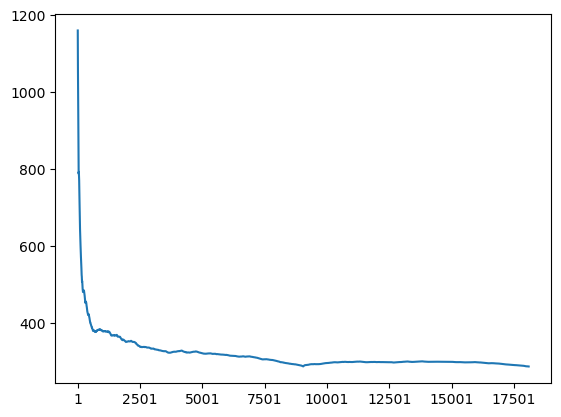

In [8]:
p_curve.max().plot()

In [9]:
p_curve.max()

1        1160.000000
2        1122.666667
3        1098.250000
4        1071.000000
5        1075.833333
            ...     
18090     286.589663
18091     286.573821
18092     286.561685
18093     286.551595
18094     286.541505
Length: 18094, dtype: float64

In [11]:
n = data['power'].to_list()
m = len(n)

In [12]:
best_efforts = []
best_efforts.append(max(n))
previous = n
for i in range(2,m + 1):
    cur = []
    j = 0
    cmax = 0
    for key, value in enumerate(n[(i-1):]):
        cur.append(value+previous[j])
        j +=1
        if cur[key] > cmax:
            cmax = cur[key]
    best_efforts.append(cmax/i)
    previous = cur

In [13]:
x = [round(t) for t in best_efforts]
z = [round(t) for t in z]

In [14]:
p_dict = {'kadanes':x, 'vectorized':z}
df=pd.DataFrame(p_dict)


<Axes: >

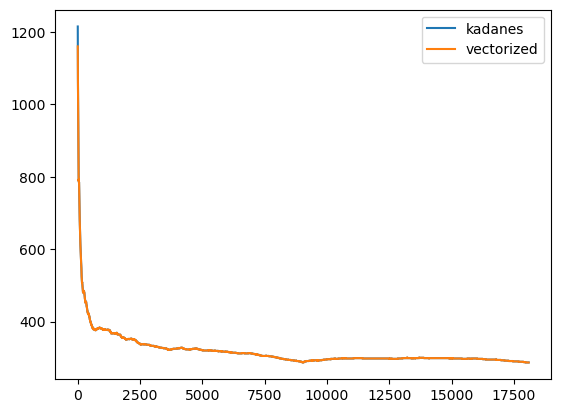

In [15]:
df.plot()